In [1]:
import sys 
import os

if 'fast_shapelets' not in [el.split('/')[-1] for el in sys.path]:
    curr_path = os.getcwd()
    sys.path.append('/'.join((curr_path.split('/')[:-1])))

In [64]:
from src import get_dataset, SAX
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train,y_train, X_test, y_test = get_dataset('StarLightCurves')

Dataset StarLightCurves loading from cache 



In [49]:
sax = SAX(7,10)

In [50]:
sax_strings = sax.transform(X_train[:100,:])

In [51]:
sax_strings.shape

(100, 2)

In [56]:
fs._compute_collision_table(X_transform, r=10)

NameError: name 'X_transform' is not defined

In [17]:
from src._fast_shapelet import get_random_hash

In [52]:
r=10

In [66]:
objs = [np.unique(multiple_sax_string) for multiple_sax_string in sax_strings]
n_different_string = np.sum([len(obj) for obj in objs])
idx_table = np.concatenate([[i] * len(obj) for i, obj in enumerate(objs)])

collision_table = np.zeros((n_different_string, len(objs)), dtype=np.int32)
objs = np.concatenate(objs, axis=0)

random_hashes = get_random_hash(r,len(objs[0]))
for hash_mask in random_hashes:
    projected_words = np.array([apply_mask(obj, hash_mask) for obj in objs])
    unique_words, _ = np.unique(projected_words, return_counts=True)
    for unique_word in unique_words:
        ids_to_update = np.where(unique_word == projected_words)[0]
        for id_to_update in ids_to_update:
            collision_table[id_to_update, idx_table[projected_words == unique_word]] += 1

return collision_table

(81,)
(array([75]),)
[72]
######
(array([47, 67]),)
[46 64]
######
(array([87]),)
[83]
######
(array([46]),)
[45]
######
(array([22, 99]),)
[22 95]
######
(array([7]),)
[7]
######
(array([38]),)
[37]
######
(array([82]),)
[78]
######
(array([19]),)
[19]
######
(array([93]),)
[89]
######
(array([78]),)
[74]
######
(array([33]),)
[32]
######
(array([92]),)
[88]
######
(array([41]),)
[40]
######
(array([61]),)
[59]
######
(array([17]),)
[17]
######
(array([10, 73]),)
[10 70]
######
(array([23]),)
[22]
######
(array([34]),)
[33]
######
(array([72]),)
[69]
######
(array([86]),)
[82]
######
(array([ 31,  43, 102]),)
[30 42 98]
######
(array([85]),)
[81]
######
(array([81]),)
[77]
######
(array([5]),)
[5]
######
(array([11, 79]),)
[11 75]
######
(array([2]),)
[2]
######
(array([54]),)
[53]
######
(array([103]),)
[99]
######
(array([71]),)
[68]
######
(array([40]),)
[39]
######
(array([57, 59]),)
[56 57]
######
(array([6, 8]),)
[6 8]
######
(array([100]),)
[96]
######
(array([51, 63]),)
[50 61

In [11]:
def apply_mask(sax_string, mask):
    return ''.join(np.array(list(sax_string))[mask])

In [65]:
from itertools import product

In [61]:
import matplotlib.pyplot as plt


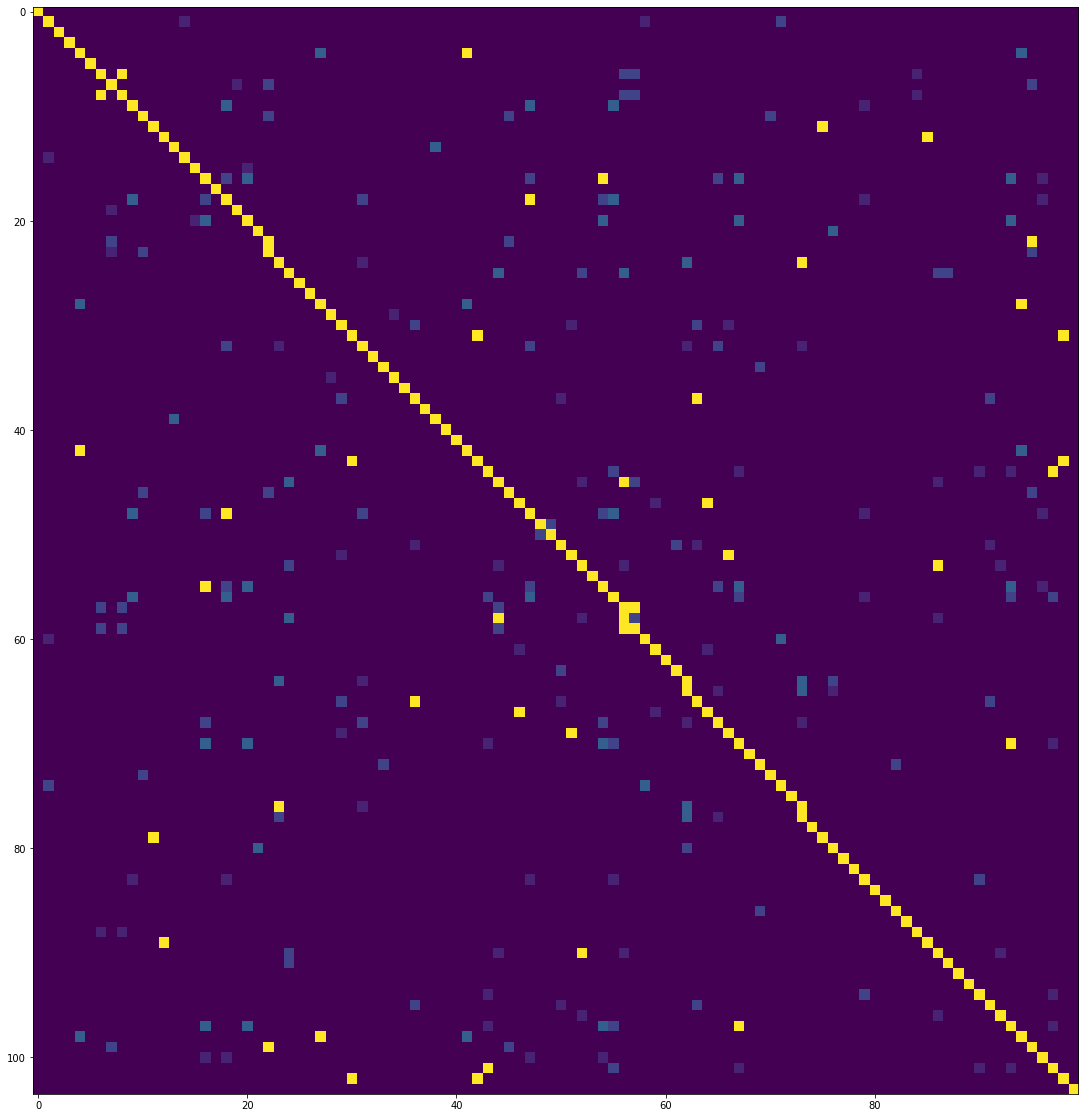

In [67]:
#bigger image
plt.figure(figsize=(20,20))
plt.imshow(collision_table)